import library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn import cluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics
from scipy import stats
from sklearn.decomposition import PCA

read data

In [ ]:
credit_card = pd.read_csv('/content/sample_data/CC GENERAL.csv')

In [ ]:
credit_card.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

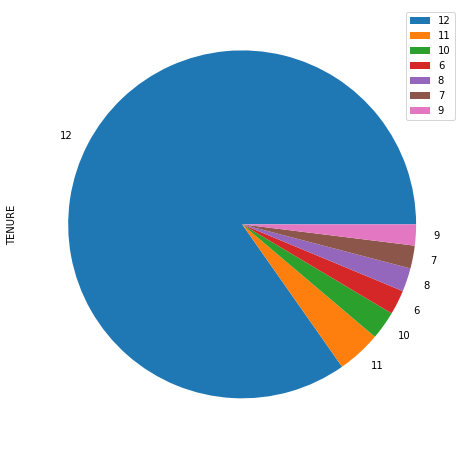

In [ ]:
credit_card=pd.DataFrame(credit_card['TENURE'].value_counts())
plot = credit_card.plot.pie(y='TENURE', figsize=(8, 8));

check unique value for each column

In [ ]:
for col in credit_card:
    print(col)
    print(credit_card[col].unique())
    print('\n')

CUST_ID
['C10001' 'C10002' 'C10003' ... 'C19188' 'C19189' 'C19190']


BALANCE
[  40.900749 3202.467416 2495.148862 ...   23.398673   13.457564
  372.708075]


BALANCE_FREQUENCY
[0.818182 0.909091 1.       0.636364 0.545455 0.875    0.454545 0.727273
 0.5      0.888889 0.090909 0.272727 0.363636 0.       0.666667 0.75
 0.857143 0.181818 0.333333 0.6      0.3      0.125    0.9      0.833333
 0.8      0.2      0.777778 0.555556 0.25     0.142857 0.571429 0.4
 0.444444 0.714286 0.222222 0.1      0.625    0.428571 0.111111 0.285714
 0.7      0.375    0.166667]


PURCHASES
[  95.4     0.    773.17 ...  291.12  144.4  1093.25]


ONEOFF_PURCHASES
[   0.    773.17 1499.   ...  734.4  1012.73 1093.25]


INSTALLMENTS_PURCHASES
[  95.4     0.   1333.28 ...  113.28  291.12  144.4 ]


CASH_ADVANCE
[   0.       6442.945483  205.788017 ... 8555.409326   36.558778
  127.040008]


PURCHASES_FREQUENCY
[0.166667 0.       1.       0.083333 0.666667 0.333333 0.25     0.75
 0.5      0.416667 0.916667 0.58333

check num of null value in each column

In [ ]:
credit_card.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Customer ID dont add value to data  so, simply i will drop it

In [ ]:
credit_card.drop(['CUST_ID'], axis=1, inplace=True)

Descriptive Statistics of Data

In [ ]:
credit_card.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


mean PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are  low


In [ ]:
credit_card.duplicated().sum()

0

no duplicate in data

detect outliers

In [ ]:
list(credit_card.columns)

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


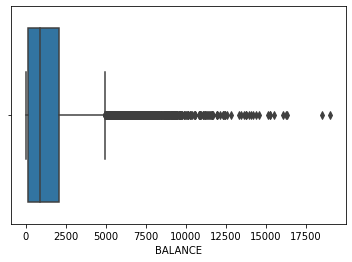

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


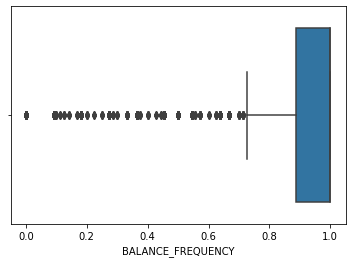

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


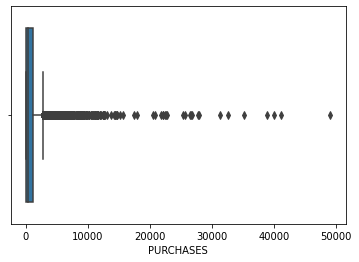

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


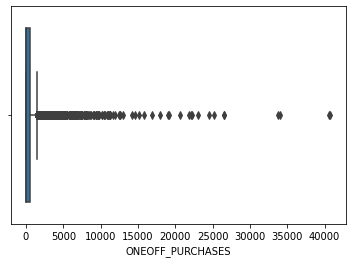

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


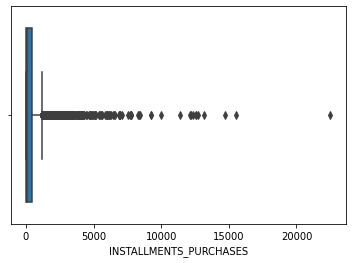

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


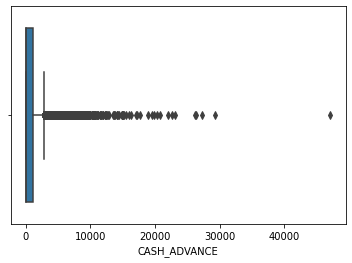

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


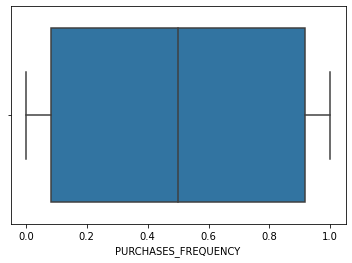

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


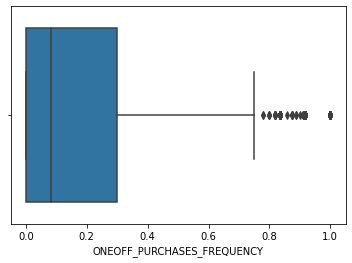

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


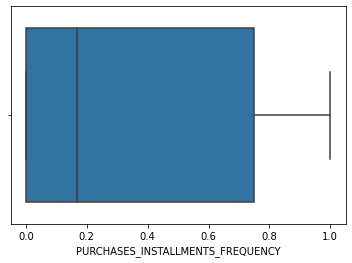

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


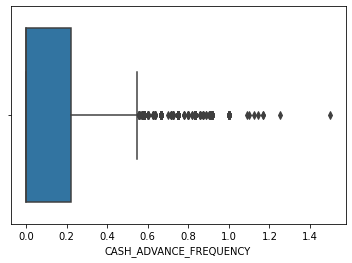

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


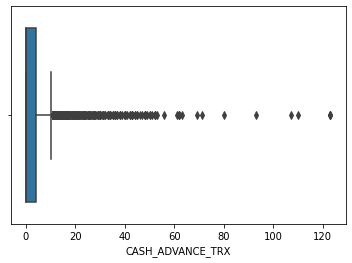

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


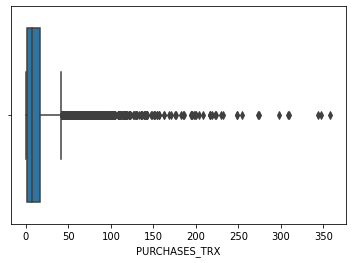

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


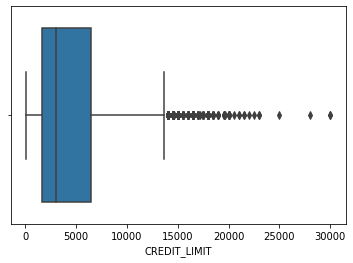

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


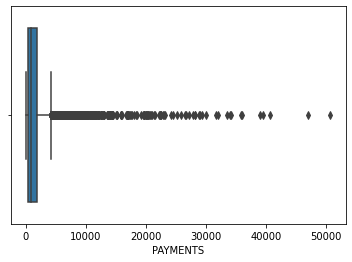

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


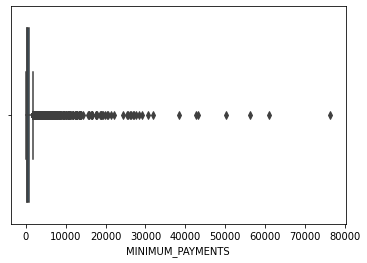

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


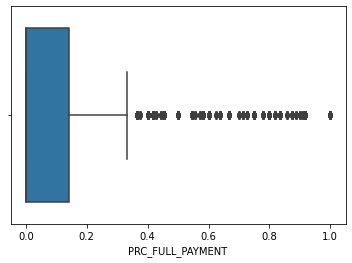

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


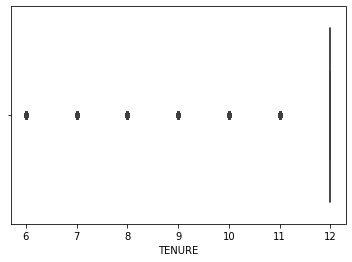

In [ ]:
allcol=['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']
for col in allcol:
    sns.boxplot(credit_card[col])
    plt.show()


we cant say we have outliers because this outliers may be  represent a cluster of users.

detect skwness

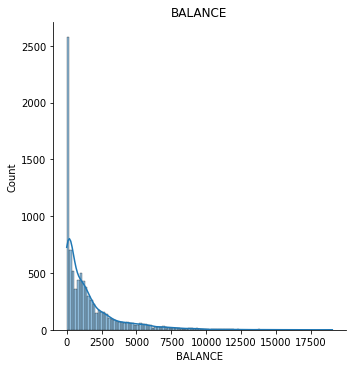

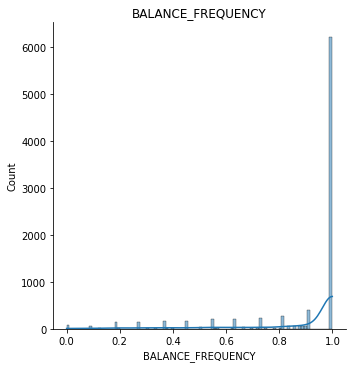

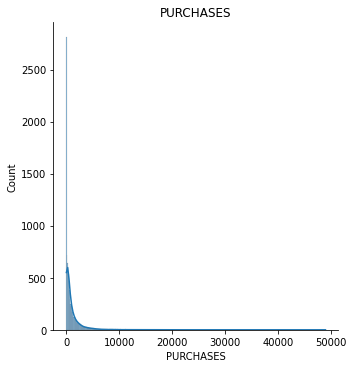

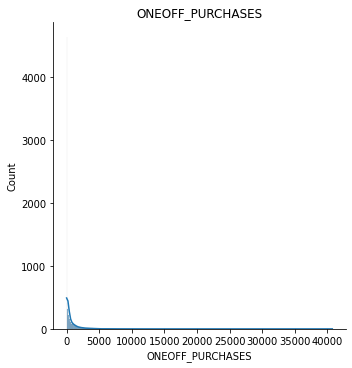

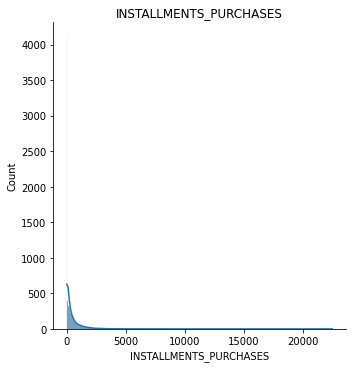

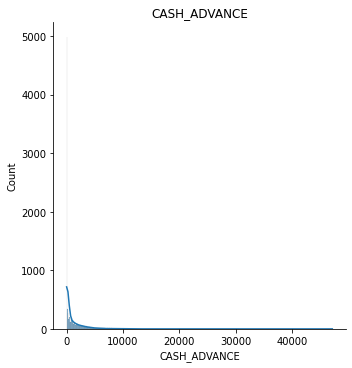

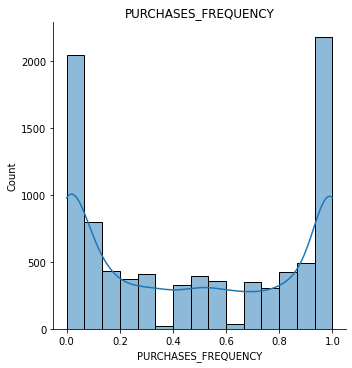

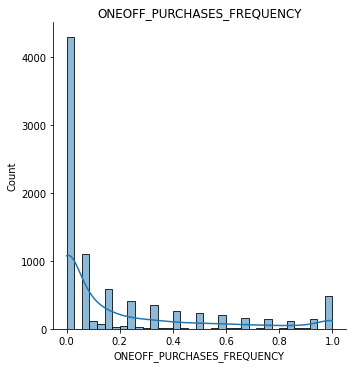

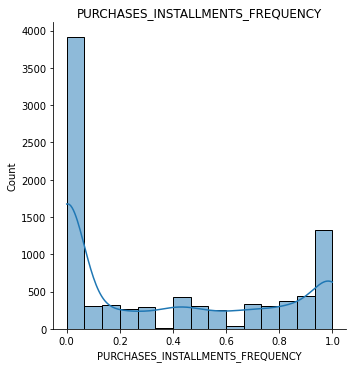

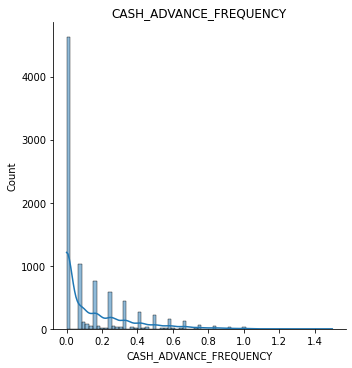

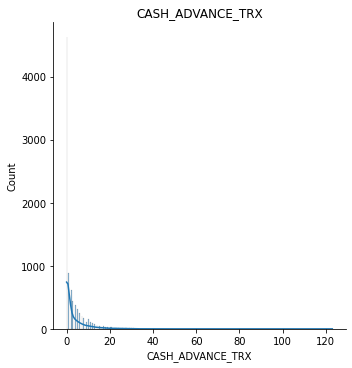

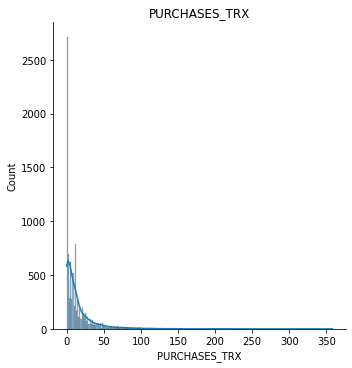

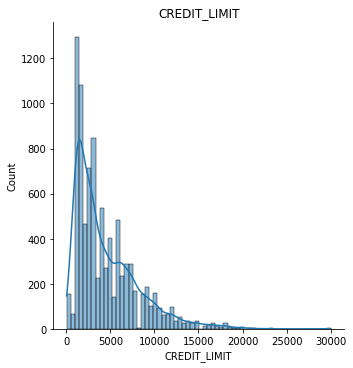

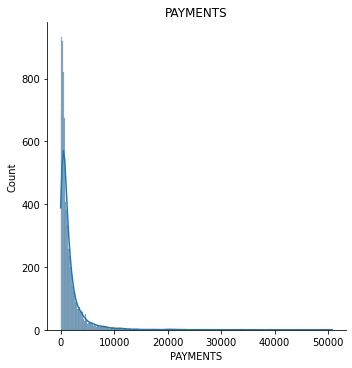

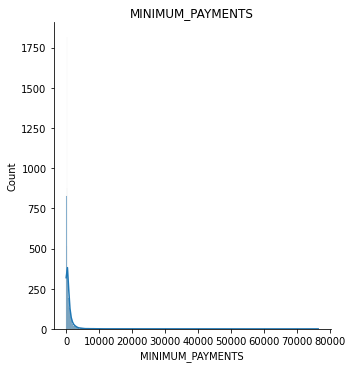

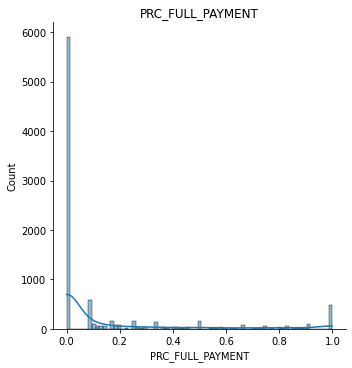

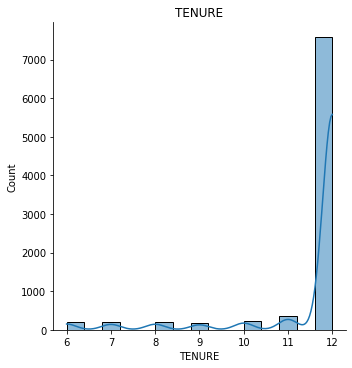

In [ ]:
for col in allcol:
    sns.displot(credit_card[col],kde=True)
    plt.title(f'{col}')
    plt.show()

as we can see


*   we have a lot of skewness in data ,and this is expected because as we know  a few customers who do alot of transactions.




*   The balance frequency for most customers is updated frequently.

*   most users don't do cash in advance.

*   most users don't do cash in advance.
*   in purchases frequency, there are two distinct group of users.


*  most usersare 12 years tenure.

as we see MINIMUM_PAYMENTS is skweed  so i decide fill it by meduain

In [ ]:
credit_card['MINIMUM_PAYMENTS'] = credit_card['MINIMUM_PAYMENTS'].fillna(credit_card['MINIMUM_PAYMENTS'].median())

CREDIT_LIMIT it have only one missing value

In [ ]:
credit_card['CREDIT_LIMIT'] = credit_card['CREDIT_LIMIT'].fillna(credit_card['CREDIT_LIMIT'].median())

apply PowerTransformer to Handle Skewed Data


In [ ]:
for col in credit_card.columns :
    power = PowerTransformer()
    credit_card[col] = power.fit_transform(credit_card[[col]])

apply z-score  to normalize data

In [ ]:
for col in credit_card.columns :
    credit_card[col] = stats.zscore(credit_card[[col]])

correlation

<ipython-input-34-f45b04b720ab>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(correlation, dtype=np.bool))


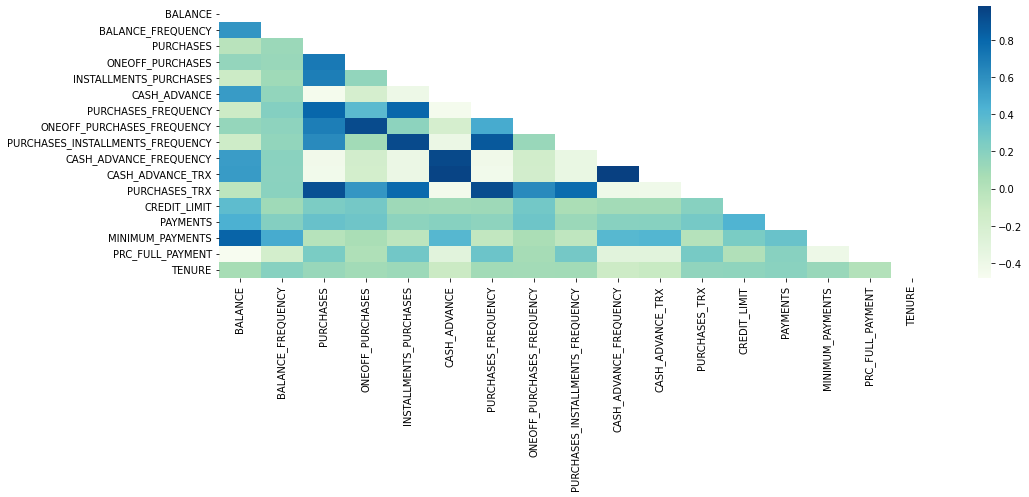

In [ ]:
correlation= credit_card.corr(method='pearson')
mask = np.triu(np.ones_like(correlation, dtype=np.bool))
plt.figure(figsize = (16,5))
sns.heatmap(correlation, cmap='GnBu', mask=mask)
plt.show()

as we see we have strong correlation between (one off purchases & Purchases)
(Purchases intallments frequency & Purchases frequency)
(Cash advance trx & Cash  advance frequency)
(Purchases & Purchases trx)

all algorthim without applying pca

k_mean :determine num of cluster using elpo graph

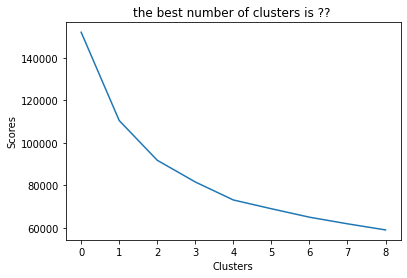

In [ ]:
scores_1 = []
range_values = range(1,10)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(credit_card)
    scores_1.append(kmeans.inertia_)
plt.plot(scores_1)
plt.title('the best number of clusters is ?? ')
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.show()

4 cluster

In [ ]:
kmean = KMeans(n_clusters=4, random_state=0, n_init=1)
kmean = kmean.fit(credit_card)
kmean.labels_

array([3, 1, 0, ..., 3, 1, 2], dtype=int32)

In [ ]:
kmean.labels_.max()

3

In [ ]:
labels = kmean.labels_

clusterCount = np.bincount(labels)
print("no datapoint in each column is ",clusterCount)

no datapoint in each column is  [2037 2570 1623 2720]


In [ ]:
silhouette_score(credit_card, kmean.labels_)

0.2301232035338797

In [ ]:
for x in range(2, 6):
        alg = KMeans(n_clusters = x, )
        label = alg.fit_predict(credit_card)
        print('Silhouette-Score for', x,  'Clusters: ', silhouette_score(credit_card, label) , '  Inertia: ',alg.inertia_)
print()

Silhouette-Score for 2 Clusters:  0.261967232539138   Inertia:  110513.08504449918
Silhouette-Score for 3 Clusters:  0.2371910133217963   Inertia:  91774.94132741951
Silhouette-Score for 4 Clusters:  0.23042106462562947   Inertia:  81543.83246234489
Silhouette-Score for 5 Clusters:  0.242478230287535   Inertia:  73061.25383427733



In [ ]:
kmean = KMeans(n_clusters=2, random_state=0, n_init=1)
kmean = kmean.fit(credit_card)
kmean.labels_

array([0, 1, 0, ..., 0, 1, 0], dtype=int32)

In [ ]:
labels = kmean.labels_

clusterCount = np.bincount(labels)
print("no datapoint in each column is ",clusterCount)

no datapoint in each column is  [5723 3227]


Hierarchical

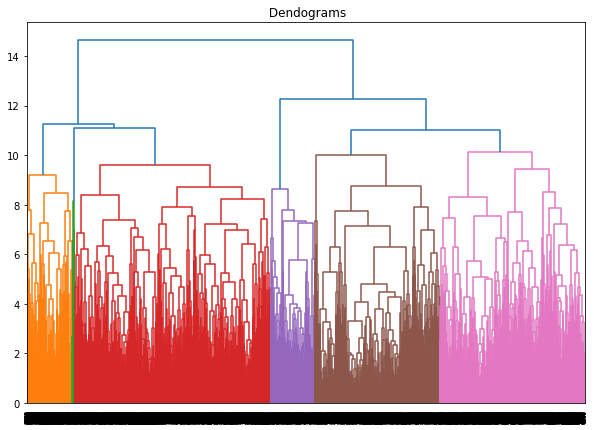

In [ ]:
plt.figure(figsize=(10, 7))
plt.title(" Dendograms")
dend = shc.dendrogram(shc.linkage(y=credit_card , method="complete",metric="euclidean"),orientation='top')

In [ ]:
si_score_hirercal = []

for cluster in range(2,7,1):
    for linkage_method in ['ward', 'average', 'complete']:
        agglomerative = AgglomerativeClustering(linkage=linkage_method, affinity='euclidean',n_clusters=cluster).fit_predict(credit_card)
        sil_score = metrics.silhouette_score(credit_card, agglomerative, metric='euclidean')
        si_score_hirercal.append((cluster, sil_score, linkage_method, len(set(agglomerative)) ) )
print('cluster', 'sil_score','linkage_method', 'number_of_clusters')
print(si_score_hirercal)

cluster sil_score linkage_method number_of_clusters
[(2, 0.2423510144661752, 'ward', 2), (2, 0.2508238525564196, 'average', 2), (2, 0.11124294370897007, 'complete', 2), (3, 0.22025948389041475, 'ward', 3), (3, 0.13791397573781894, 'average', 3), (3, 0.08252341137748218, 'complete', 3), (4, 0.20180365832238814, 'ward', 4), (4, 0.08902816612153214, 'average', 4), (4, 0.04447006656942757, 'complete', 4), (5, 0.1945693050993428, 'ward', 5), (5, 0.024274941442186202, 'average', 5), (5, 0.041247558166405, 'complete', 5), (6, 0.20293102941120184, 'ward', 6), (6, 0.13559819678727275, 'average', 6), (6, 0.07299861941022577, 'complete', 6)]


In [ ]:
clustering = AgglomerativeClustering(n_clusters=2,linkage='average').fit(credit_card)
labels=clustering.labels_
labels

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
silhouette_score(credit_card,clustering.labels_,metric='euclidean')

0.2508238525564196

In [ ]:
labels = kmean.labels_

clusterCount = np.bincount(labels)
print("no datapoint in each column is ",clusterCount)

no datapoint in each column is  [5723 3227]


DBSCAN

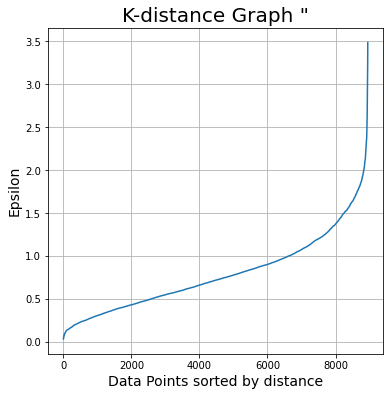

In [ ]:
nn = NearestNeighbors(n_neighbors=17)
nbrs = nn.fit(credit_card)
distances, indices = nbrs.kneighbors(credit_card)

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(6,6))
plt.plot(distances)
plt.title('K-distance Graph "',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.grid()
plt.show()

In [ ]:
dbscan = DBSCAN(1.5, min_samples=17, n_jobs=6).fit(credit_card)

silhouette_score(credit_card, dbscan.labels_)

-0.023069679566801247

In [ ]:
labels = kmean.labels_

clusterCount = np.bincount(labels)
print("no datapoint in each column is ",clusterCount)

no datapoint in each column is  [5723 3227]


GMM

In [ ]:
si_score_GMM = []
for cluster in range(2,21,2):
    for covariance_type in ['full', 'tied', 'diag', 'spherical']:
        gmm  = GaussianMixture(n_components = cluster,covariance_type = covariance_type, random_state = 40).fit_predict(credit_card)
        sil_score = metrics.silhouette_score(credit_card, gmm, metric='euclidean')
        si_score_GMM.append((cluster, sil_score, covariance_type, len(set(gmm)) ) )
print('cluster', 'sil_score','covariance_type', 'number_of_clusters')
print(si_score_GMM)

cluster sil_score covariance_type number_of_clusters
[(2, 0.2316855291449207, 'full', 2), (2, 0.24223235137845353, 'tied', 2), (2, 0.2511804088852911, 'diag', 2), (2, 0.2531339310354109, 'spherical', 2), (4, 0.20818290934633116, 'full', 4), (4, 0.1981119780893219, 'tied', 4), (4, 0.20728173380835052, 'diag', 4), (4, 0.20771404572372118, 'spherical', 4), (6, 0.20303958731971342, 'full', 6), (6, 0.19592916843508532, 'tied', 6), (6, 0.20333405826048517, 'diag', 6), (6, 0.2157381498202835, 'spherical', 6), (8, 0.1042910023719625, 'full', 8), (8, 0.11640471689992547, 'tied', 8), (8, 0.16708150402352515, 'diag', 8), (8, 0.1529510469962566, 'spherical', 8), (10, 0.16272220646880156, 'full', 10), (10, 0.10599231340956089, 'tied', 10), (10, 0.1535237081963189, 'diag', 10), (10, 0.12440782248180025, 'spherical', 10), (12, 0.17794059153909214, 'full', 12), (12, 0.1361247017417974, 'tied', 12), (12, 0.15431414079806105, 'diag', 12), (12, 0.14351728689962048, 'spherical', 12), (14, 0.12469155946888

In [ ]:
gm=GaussianMixture(n_components=2, covariance_type='spherical').fit(credit_card)
gm_label=gm.predict(credit_card)

In [ ]:
silhouette_score(credit_card, gm_label)

0.25306857496914453

all algorthim after applying pca

In [ ]:
for y in range(2, 10):
    print("PCA with ", y,"component")
    pca = PCA(n_components=y)
    data_p = pca.fit_transform(credit_card)
    alg = KMeans(n_clusters = 2, )
    label = alg.fit_predict(data_p)
    print('Silhouette-Score for', 2,  'Clusters: ', silhouette_score(data_p, label) , '       Inertia: ',alg.inertia_)
print()

PCA with  2 component
Silhouette-Score for 2 Clusters:  0.44032561542300086        Inertia:  47198.419775626004
PCA with  3 component
Silhouette-Score for 2 Clusters:  0.37720197923868526        Inertia:  62432.321648515965
PCA with  4 component
Silhouette-Score for 2 Clusters:  0.34042250064340734        Inertia:  74087.12969607706
PCA with  5 component
Silhouette-Score for 2 Clusters:  0.31487975832752074        Inertia:  84408.78671841542
PCA with  6 component
Silhouette-Score for 2 Clusters:  0.2987421626679391        Inertia:  91517.85574534375
PCA with  7 component
Silhouette-Score for 2 Clusters:  0.28667304860039106        Inertia:  97555.241152504
PCA with  8 component
Silhouette-Score for 2 Clusters:  0.2769165670533696        Inertia:  102182.55803154767
PCA with  9 component
Silhouette-Score for 2 Clusters:  0.271215856392575        Inertia:  105274.19279136314



1- kmeans

Text(0, 0.5, 'PC2')

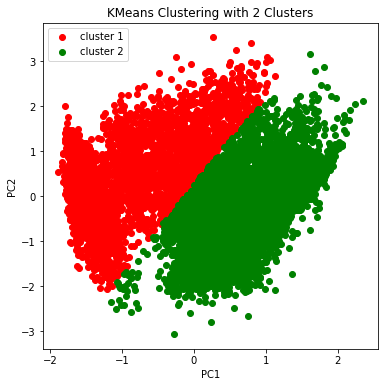

In [ ]:
data_p = pd.DataFrame(PCA(n_components = 2,whiten=True).fit_transform(credit_card))
preds = pd.Series(KMeans(n_clusters =2).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

fig = plt.figure(figsize = (6, 6))
colors = ['red', 'green']
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.legend()
plt.title('KMeans Clustering with 2 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

Agglomerative Hierarchical Clustering

Text(0, 0.5, 'PC2')

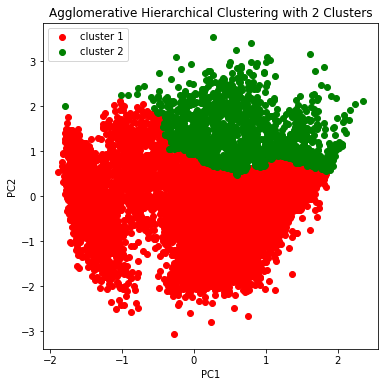

In [ ]:
data_p = pd.DataFrame(PCA(n_components = 2,whiten=True).fit_transform(credit_card))
preds = pd.Series(AgglomerativeClustering(n_clusters=2,linkage='average').fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

fig = plt.figure(figsize = (6, 6))
colors = ['red', 'green']
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.legend()
plt.title('Agglomerative Hierarchical Clustering with 2 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

DBSCAN

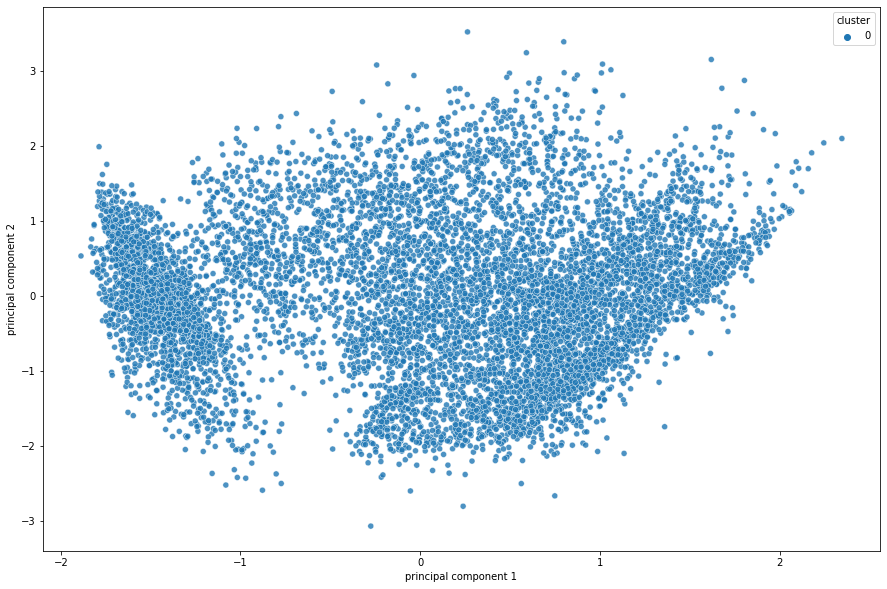

In [ ]:
dbscan = DBSCAN(eps=1.5, min_samples=17)
data_p = pd.DataFrame(PCA(n_components = 2,whiten=True).fit_transform(credit_card))
preds = pd.Series(dbscan.fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = ['principal component 1', 'principal component 2','cluster']
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="principal component 1", y="principal component 2", hue="cluster", data=data_p,alpha=0.8)
plt.show()

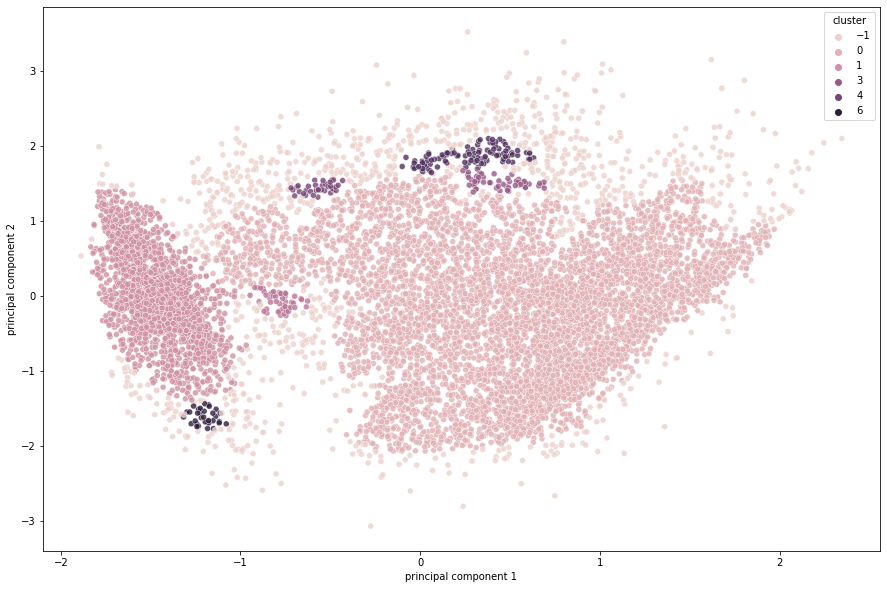

In [ ]:

dbscan = DBSCAN(eps=0.1, min_samples=17)
data_p = pd.DataFrame(PCA(n_components = 2,whiten=True).fit_transform(credit_card))
preds = pd.Series(dbscan.fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = ['principal component 1', 'principal component 2','cluster']
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="principal component 1", y="principal component 2", hue="cluster", data=data_p,alpha=0.8)
plt.show()

GaussianMixture

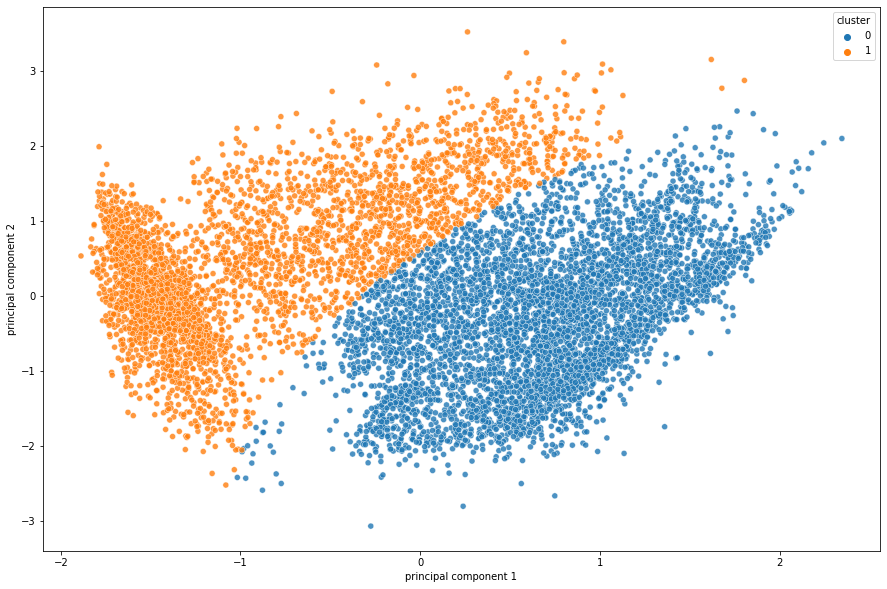

In [ ]:
gm = GaussianMixture(n_components=2, covariance_type='spherical')
data_p = pd.DataFrame(PCA(n_components = 2,whiten=True).fit_transform(credit_card))
preds = pd.Series(gm.fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = ['principal component 1', 'principal component 2','cluster']
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="principal component 1", y="principal component 2", hue="cluster", data=data_p,alpha=0.8)
plt.show()